In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').


EDA

    Load the data.
    Look at the median_house_value variable. Does it have a long tail?

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 17:44:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 4.71M 0s
    50K .......... .......... .......... .......... ..........  7% 14.6M 0s
   100K .......... .......... .......... .......... .......... 10% 8.95M 0s
   150K .......... .......... .......... .......... .......... 14% 12.1M 0s
   200K .......... .......... .......... .......... .......... 17% 14.6M 0s
   250K .......... .......... .......... .......... .......... 21% 10.7M 0s
   300K .......... .......... .......... .......... .......... 25% 14.5M 0s
   350K .......... .......... ..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.shape

(20640, 10)

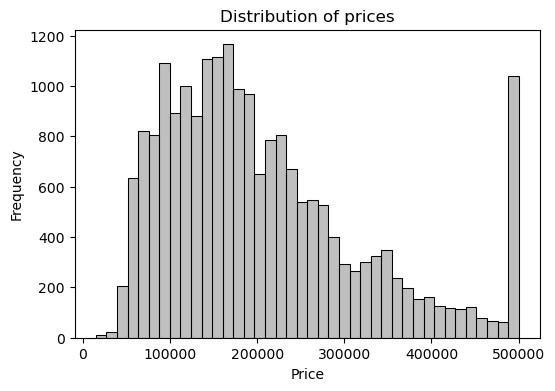

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(data.median_house_value, bins=40, color='black', alpha=0.25)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

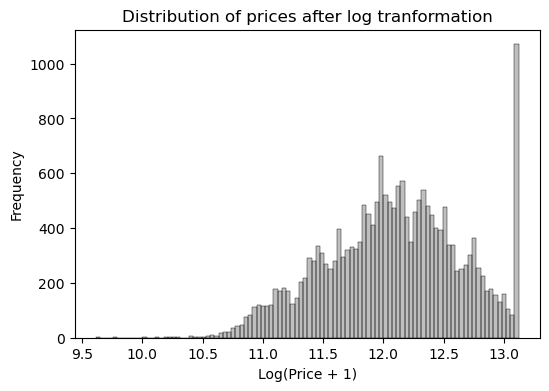

In [8]:
log_price = np.log1p(data['median_house_value'])

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=100, color='black', alpha=0.25)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

Features

For the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'

Select only them.

In [9]:
housing = data.drop(["ocean_proximity"], axis=1)

In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Question 1 

Find a feature with missing values. How many missing values does it have?

    207
    307
    408
    508

In [11]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms has **207 missing values**

## Question 2

What's the median (50% percentile) for variable 'population'?

    1133
    1122
    1166
    1188

In [12]:
housing.population.median() # housing['population'].median()

1166.0

Split the data

    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Make sure that the target value ('median_house_value') is not in your dataframe.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [13]:
np.random.seed(42)

n = housing.shape[0]  # Length of the dataframe

n_val = int(0.2 * n) # 20% of length of the dataframe
n_test = int(0.2 * n) # 20% of length of the dataframe
n_train = n - (n_val + n_test) # 60% of length of the dataframe 

idx = np.arange(n) # Generate indices for dataframe 
np.random.shuffle(idx) 

df_shuffled = housing.iloc[idx] # Shuffled dataframe generated 

df_train = df_shuffled.iloc[:n_train].copy() # Train Data
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() # Validation Data
df_test = df_shuffled.iloc[n_train+n_val:].copy() # Test Data

In [14]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [15]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good

In [16]:
cols = df_train.columns
cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

### Function Definitions

In [17]:
# Data Preparation (Filling NaN with values considering selected columns)
def prepare_X(df, cols, fill_value):
    df_num = df[cols]
    df_num = df_num.fillna(fill_value, axis=0)
    X = df_num.values
    return X

In [18]:
# Linear Regression Function Definition
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
# RMSE Function Definition
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Train model using Linear Regression with data prepared by using fill_value with 0


In [20]:
# Train model using Linear Regression with data prepared by using fill_value with 0

x_train_0 = prepare_X(df_train, cols, 0)
w_0, w = train_linear_regression(x_train_0, y_train)

y_pred_0 = w_0 + x_train_0.dot(w)

train_rmse_0 = round(rmse(y_train, y_pred_0), 2)
print(train_rmse_0)

0.34


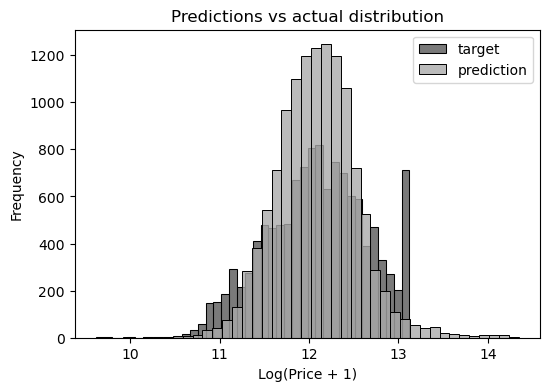

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [22]:
# Validate the model
x_val_0 = prepare_X(df_val, cols, 0)
y_val_pred_0 = w_0 + x_val_0.dot(w)

val_rmse_0 = round(rmse(y_val, y_val_pred_0), 2)
print(val_rmse_0)

0.33


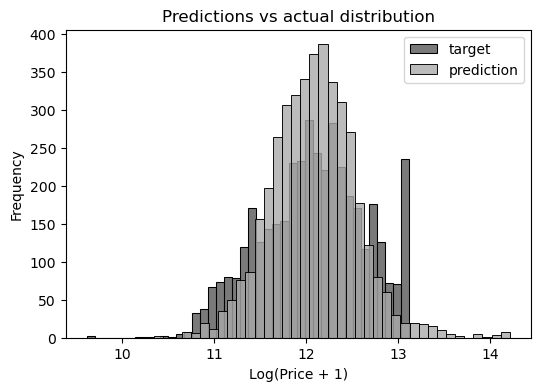

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Train model using Linear Regression with data prepared by using fill_value = df_train's mean


In [24]:
bedroom_mean =  df_train['total_bedrooms'].mean()
bedroom_mean

533.4803317730147

In [25]:
# Train model using Linear Regression with data prepared by using fill_value with 0

x_train_fill_mean = prepare_X(df_train, cols, bedroom_mean)
w_0, w = train_linear_regression(x_train_fill_mean, y_train)

y_pred_fill_mean = w_0 + x_train_fill_mean.dot(w)

train_rmse_fill_mean = round(rmse(y_train, y_pred_fill_mean), 2)
print(train_rmse_fill_mean)

0.34


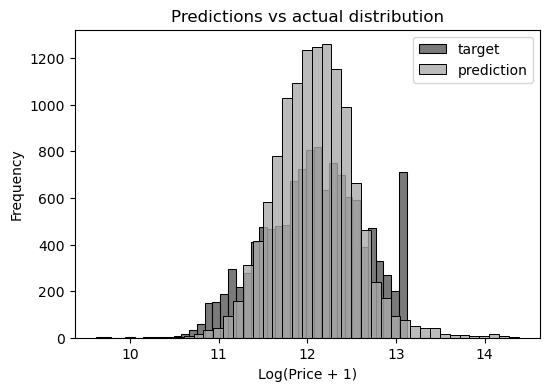

In [26]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_fill_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [27]:
# Validate the model
x_val_fill_mean = prepare_X(df_val, cols, bedroom_mean)
y_val_pred_fill_mean = w_0 + x_val_fill_mean.dot(w)

val_rmse_fill_mean = round(rmse(y_val, y_val_pred_fill_mean), 2)
print(val_rmse_fill_mean)

0.33


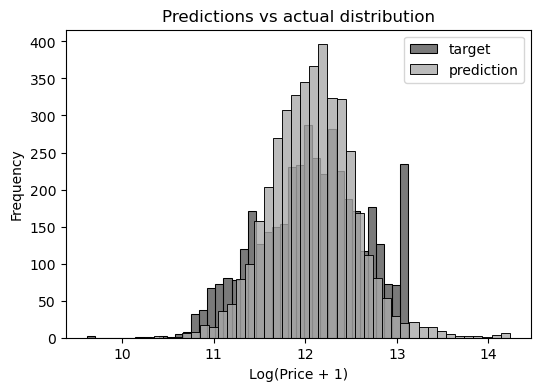

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred_fill_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
print(val_rmse_0)

0.33


In [30]:
print(val_rmse_fill_mean)

0.33


 Both options i.e. fill it with 0 or with the mean of this variable are **equally good**

## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001

### Function Definitions

In [31]:
# Data Preparation (Filling NaN with 0 considering selected columns)
def prepare_X(df, cols):
    df_num = df[cols]
    df_num = df_num.fillna(0, axis=0)
    X = df_num.values
    return X

In [32]:
# Regularized Linear Regression Function Definition
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
# RMSE Function Definition
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Train model using Regularized Linear Regression with data prepared by using 0 to fill NaN values

In [34]:
X_train = prepare_X(df_train, cols)
X_val = prepare_X(df_val, cols)

In [35]:
train_rmse = list()
val_rmse = list()

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    # Train RMSE
    y_train_pred_r =  w_0 + X_train.dot(w)
    train_rmse.append((r, round(rmse(y_train, y_train_pred_r), 2)))
    
    # Validation RMSE
    y_val_pred_r =  w_0 + X_val.dot(w)
    val_rmse.append((r, round(rmse(y_val, y_val_pred_r), 2)))
    
    print(f" r: {train_rmse[-1][0]}")
    print(f" Train RMSE: {train_rmse[-1][1]}")
    print(f" Val RMSE: {val_rmse[-1][1]}")
    print()

 r: 0
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 1e-06
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 0.0001
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 0.001
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 0.01
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 0.1
 Train RMSE: 0.34
 Val RMSE: 0.33

 r: 1
 Train RMSE: 0.35
 Val RMSE: 0.33

 r: 5
 Train RMSE: 0.35
 Val RMSE: 0.34

 r: 10
 Train RMSE: 0.35
 Val RMSE: 0.34



**r = 0** gives the smallest Validation RMSE

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

    0.16
    0.00005
    0.005
    0.15555

### Function Definitions

In [36]:
def split_data(seed):
    np.random.seed(seed)

    n = housing.shape[0]  # Length of the dataframe

    n_val = int(0.2 * n) # 20% of length of the dataframe
    n_test = int(0.2 * n) # 20% of length of the dataframe
    n_train = n - (n_val + n_test) # 60% of length of the dataframe 

    idx = np.arange(n) # Generate indices for dataframe 
    np.random.shuffle(idx) 

    df_shuffled = housing.iloc[idx] # Shuffled dataframe generated 

    df_train = df_shuffled.iloc[:n_train].copy() # Train Data
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() # Validation Data
    df_test = df_shuffled.iloc[n_train+n_val:].copy() # Test Data
    
    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return (df_train, y_train), (df_val, y_val), (df_test, y_test)

In [37]:
# Data Preparation (Filling NaN with values considering selected columns)
def prepare_X(df, cols):
    df_num = df[cols]
    df_num = df_num.fillna(0, axis=0)
    X = df_num.values
    return X

In [38]:
# Linear Regression Function Definition
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [39]:
# RMSE Function Definition
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Train the Model and calculate RMSE Standard Deviation for the given seed values

In [40]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
seed_val_rmse = list()

for seed in seed_values:
    
    print(f" Seed: {seed}")
    
    train, val, test = split_data(seed)
    X_train = prepare_X(train[0], train[0].columns)
    y_train = train[1]
    w_0, w = train_linear_regression(X_train, y_train)

    # Train RMSE
    y_train_pred =  w_0 + X_train.dot(w)
    print(f" Train RMSE: {round(rmse(y_train, y_train_pred), 2)}")
    
    
    # Validation RMSE
    X_val = prepare_X(val[0], val[0].columns)
    y_val = val[1]
    y_val_pred =  w_0 + X_val.dot(w)
    seed_val_rmse.append(round(rmse(y_val, y_val_pred),2))
    
    print(f" Val RMSE: {seed_val_rmse[-1]}")
    print()

 Seed: 0
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 1
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 2
 Train RMSE: 0.34
 Val RMSE: 0.33

 Seed: 3
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 4
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 5
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 6
 Train RMSE: 0.34
 Val RMSE: 0.35

 Seed: 7
 Train RMSE: 0.34
 Val RMSE: 0.34

 Seed: 8
 Train RMSE: 0.34
 Val RMSE: 0.35

 Seed: 9
 Train RMSE: 0.34
 Val RMSE: 0.34



In [42]:
seed_val_rmse

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [43]:
seed_val_rmse_std = np.array(seed_val_rmse).std()
seed_val_rmse_std

0.005385164807134491

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

    0.35
    0.135
    0.450
    0.245

In [44]:
seed = 9

np.random.seed(seed)

n = housing.shape[0]  # Length of the dataframe

n_test = int(0.2 * n) # 20% of length of the dataframe
n_train = n - (n_test) # 80% of length of the dataframe 

idx = np.arange(n) # Generate indices for dataframe 
np.random.shuffle(idx) 

df_shuffled = housing.iloc[idx] # Shuffled dataframe generated 

df_train = df_shuffled.iloc[:n_train].copy() # Train Data
df_test = df_shuffled.iloc[n_train:].copy() # Test Data

y_train_orig = df_train['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(y_train_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_test['median_house_value']

### Function Definitions

In [45]:
# Data Preparation (Filling NaN with values considering selected columns)
def prepare_X(df, cols):
    df_num = df[cols]
    df_num = df_num.fillna(0, axis=0)
    X = df_num.values
    return X

In [46]:
# Regularized Linear Regression Function Definition
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [47]:
# RMSE Function Definition
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Train the model and Calculate Test RMSE

In [48]:
X_train = prepare_X(df_train, df_train.columns)
X_test = prepare_X(df_test, df_test.columns)

In [49]:
test_rmse = 0
r=0.001

print(f"r: {r}")

w_0, w = train_linear_regression_reg(X_train, y_train, r)
    
# Train RMSE
y_train_pred_r =  w_0 + X_train.dot(w)
print(f"Train RMSE: {round(rmse(y_train, y_train_pred_r), 2)}")

# Test RMSE
y_test_pred_r =  w_0 + X_test.dot(w)
test_rmse = round(rmse(y_test, y_test_pred_r), 2)
    
print(f"Test RMSE: {test_rmse}")
print()

r: 0.001
Train RMSE: 0.34
Test RMSE: 0.35

